In [ ]:
# Imports
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Data generators with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


In [ ]:
# Training and validation sets
training_set = train_datagen.flow_from_directory(
    'train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_set = train_datagen.flow_from_directory(
    'train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2419 images belonging to 6 classes.
Found 603 images belonging to 6 classes.


In [ ]:
# Test set (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    'test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 433 images belonging to 6 classes.


In [ ]:
# Model definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(training_set.num_classes, activation='softmax')
])

C:\Users\AI\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,974 (2.61 MB)

 Trainable params: 683,974 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model and capture history
history = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10
)

C:\Users\AI\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.2405 - loss: 1.7513 - val_accuracy: 0.3367 - val_loss: 1.6303
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.3951 - loss: 1.5293 - val_accuracy: 0.3980 - val_loss: 1.5692
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 52s 683ms/step - accuracy: 0.4077 - loss: 1.4916 - val_accuracy: 0.3930 - val_loss: 1.5435
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 59s 777ms/step - accuracy: 0.4378 - loss: 1.4241 - val_accuracy: 0.3466 - val_loss: 1.6051
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 42s 556ms/step - accuracy: 0.4831 - loss: 1.3420 - val_accuracy: 0.3582 - val_loss: 1.5776
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 17s 223ms/step - accuracy: 0.5162 - loss: 1.2897 - val_accuracy: 0.4013 - val_loss: 1.5023
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 17s 219ms/step - accuracy: 0.5481 - loss: 1.2115 - val_accuracy: 0.4113 - val_loss: 1.4690
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 17s 218ms/step - accuracy: 0.5885 - loss: 1.1137 - val_accuracy

In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_set)
print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 0.5640 - loss: 1.2434

✅ Test Accuracy: 62.82%
✅ Test Loss: 1.1285


# ✅ Plot accuracy and loss

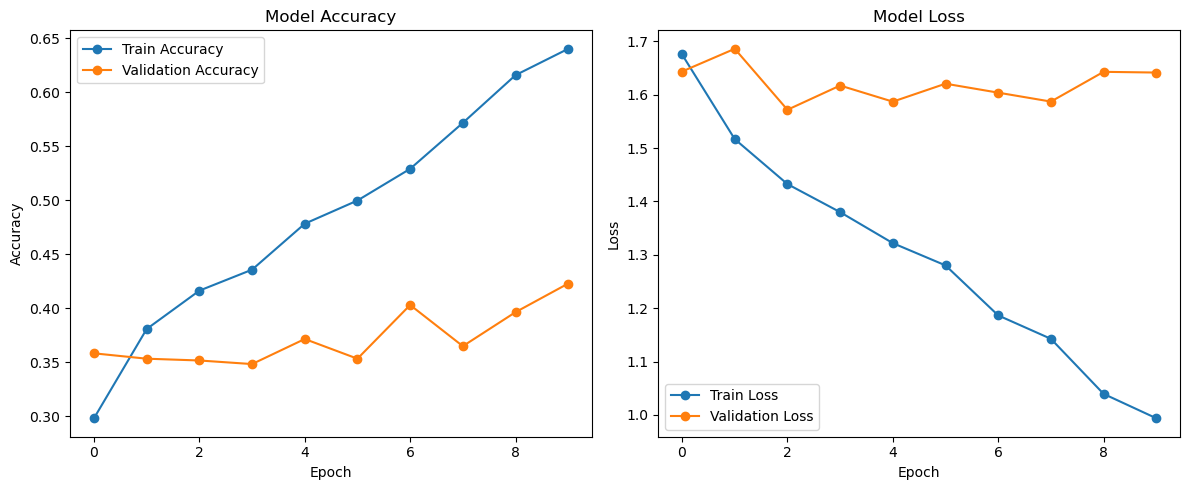

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
